<a href="https://colab.research.google.com/github/deepvirk7/Titanic---Machine-Learning-from-Disaster/blob/main/Titanic%20-%20Machine%20Learning%20from%20Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic - Machine Learning from Disaster

STEP 1 : IMPORT ALL THE IMPORTANT LIABRARIES


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

STEP 2 : INPUT THE DATA

In [47]:
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')


STEP 3 : EXPLORE THE DATA

In [45]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None
         Survived      Pclass         Sex         Age       SibSp 

STEP 4 : PREPROCESS THE DATA

In [48]:
# Combine for consistent preprocessing
combine = [train_data, test_data]

# Fill missing Age with median and Embarked with mode
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Fill Fare in test set
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Convert categorical to numeric
label = LabelEncoder()
for dataset in combine:
    dataset['Sex'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked'] = label.fit_transform(dataset['Embarked'])

# Drop unnecessary columns
train_data = train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
test_ids = test_data['PassengerId']
test_data = test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)


/tmp/ipython-input-48-3857544792.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
/tmp/ipython-input-48-3857544792.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

VISUALISING THE DATA

1.SURVIVAL COUNT

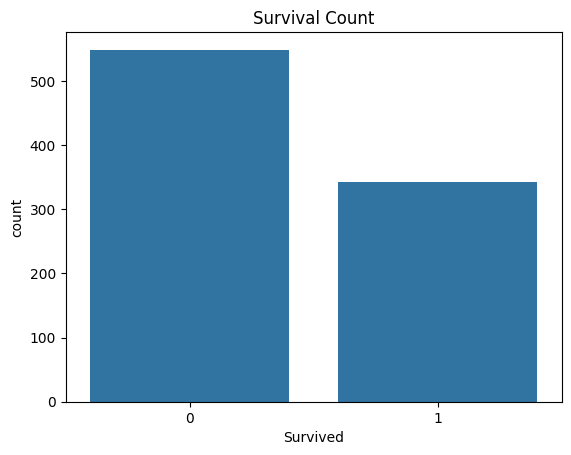

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_data, x='Survived')
plt.title("Survival Count")
plt.show()


AGE DISTRIBUTION

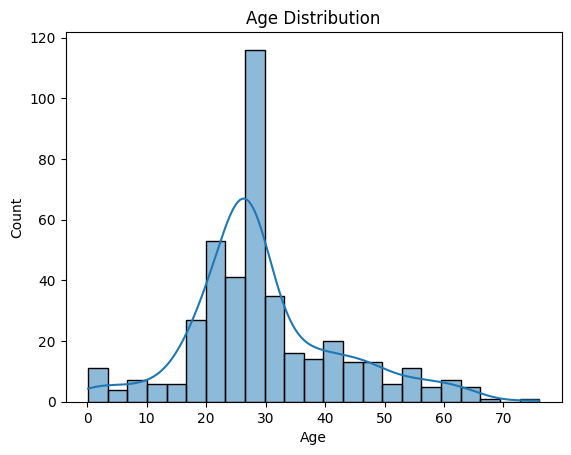

In [18]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()


SURVIVAL BY GENDER

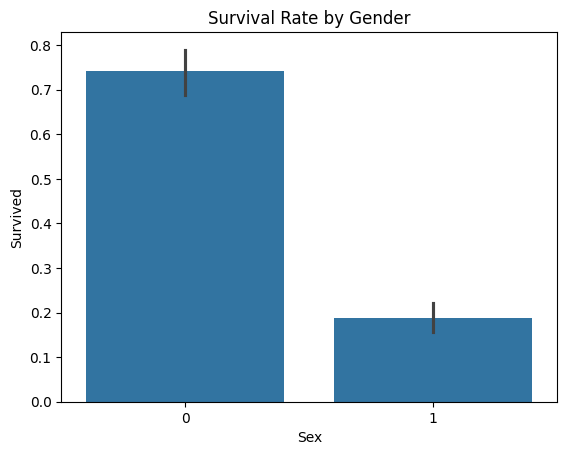

In [20]:
sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()


HEAT MAP

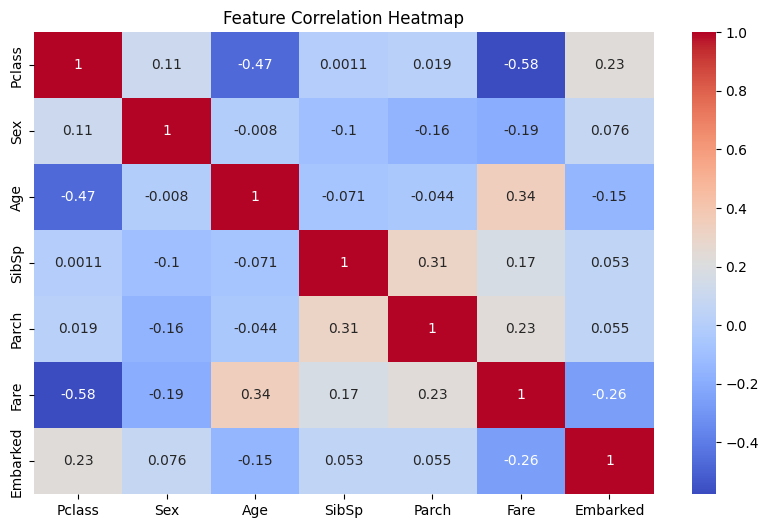

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


STEP 5: TRAIN A MODEL

In [22]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, predictions))


Validation Accuracy: 0.8212290502793296


Step 6: PREDICT ON THE TRAIN DATA SET

In [23]:
test_predictions = model.predict(test_data)

submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_predictions
})

submission.to_csv('/submission.csv', index=False)
